In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 

In [32]:
# generate random data with 5 clusters
X, y = make_blobs(n_samples=200, centers=5)

In [33]:
initiate_random_centroids = lambda X, k: np.array([np.random.choice(X[:, i], k) for i in range(X.shape[1])]).T

def l2_norm(A, B):
    A_norm = (A**2).sum(axis=1).reshape(A.shape[0],1)
    B_norm = (B**2).sum(axis=1).reshape(1,B.shape[0])
    dist = A_norm+B_norm-2*A.dot(B.transpose())
    return dist

def assign_resp(X, centroids):
    responsibilities = np.zeros((X.shape[0], centroids.shape[0]))
    dist = l2_norm(X, centroids)
    min_dist_idx = dist.argmin(axis=1)
    for i, resp in enumerate(responsibilities):
        resp[min_dist_idx[i]] = 1
    return responsibilities

def adjust_centroids(X, responsibilities):
    resp_count = responsibilities.sum(axis=0)
    sum_x_per_cluster = responsibilities.T.dot(X)
    adj_centroids = sum_x_per_cluster / (resp_count.reshape(len(resp_count), 1) + .01)
    return adj_centroids

In [36]:
prev_centroids = initiate_random_centroids(X, k=5)
resp = assign_resp(X, prev_centroids)
adjusted_centroids = adjust_centroids(X, resp)
while not np.array_equal(adjusted_centroids, prev_centroids):
    prev_centroids = adjusted_centroids
    resp = assign_resp(X, prev_centroids)
    adjusted_centroids = adjust_centroids(X, resp)

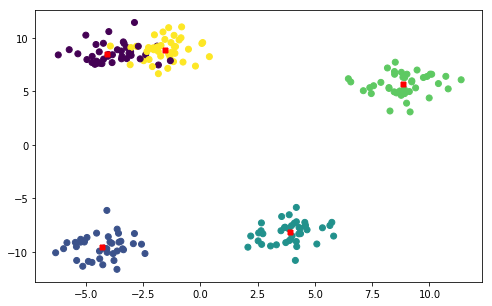

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.scatter(x=adjusted_centroids[:, 0], y=adjusted_centroids[:, 1], marker="+", lw=5, c='red')